# Loan Defaulters Prediction

Aim : whether a person will get loan or not ?
Ex : As per the data we want to find a new person with information and bank balance will get the loan or not

In [1]:
import pandas as pd 

In [2]:
main_data = pd.read_csv(r"E:\DATA-SCIENCE\Project\LoanDefaulters\binaryclassification-predicting-defaulters-dataset.csv")

In [3]:
main_data.head()

,Response,Age,Job,Marital Status,Education,balance,housing,loan
0,yes,59,retired,married,secondary,49,no,yes
1,yes,31,services,married,tertiary,90,no,yes
2,yes,47,management,married,primary,145,no,yes
3,yes,45,unemployed,divorced,primary,249,yes,yes
4,yes,36,management,single,tertiary,559,yes,no


**here mostly data in chategory let we conver it into numerical lable.**

In [4]:
X = main_data.iloc[:,:7]

In [5]:
X

,Response,Age,Job,Marital Status,Education,balance,housing
0,yes,59,retired,married,secondary,49,no
1,yes,31,services,married,tertiary,90,no
2,yes,47,management,married,primary,145,no
3,yes,45,unemployed,divorced,primary,249,yes
4,yes,36,management,single,tertiary,559,yes
...,...,...,...,...,...,...,...
1811,yes,49,unemployed,married,primary,11,yes
1812,yes,43,management,single,primary,39,yes
1813,yes,56,technician,married,tertiary,736,no
1814,yes,28,unemployed,married,primary,44,yes


In [33]:
X['Response'].value_counts()

Response
no     1001
yes     815
Name: count, dtype: int64

In [13]:
#Ordinal encoding
y = main_data['loan'].map({'yes':1,'no':0})

In [7]:
y

0       1
1       1
2       1
3       1
4       0
       ..
1811    0
1812    0
1813    0
1814    0
1815    0
Name: loan, Length: 1816, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder 

In [15]:
Lable_Response = LabelEncoder()
Lable_Job = LabelEncoder()
Lable_Maritial_Status = LabelEncoder()
Lable_Education = LabelEncoder()
Lable_Housing = LabelEncoder()

X['Response_n'] = Lable_Response.fit_transform(X['Response'])
X['Job_n'] = Lable_Job.fit_transform(X['Job'])
X['MaritalStatus_n'] = Lable_Maritial_Status.fit_transform(X['Marital Status'])
X['Education_n'] = Lable_Education.fit_transform(X['Education'])
X['housing_n'] = Lable_Housing.fit_transform(X['housing'])

In [36]:
X

,Response,Age,Job,Marital Status,Education,balance,housing,Response_n,Job_n,MaritalStatus_n,Education_n,housing_n
0,yes,59,retired,married,secondary,49,no,1,5,1,1,0
1,yes,31,services,married,tertiary,90,no,1,7,1,2,0
2,yes,47,management,married,primary,145,no,1,4,1,0,0
3,yes,45,unemployed,divorced,primary,249,yes,1,10,0,0,1
4,yes,36,management,single,tertiary,559,yes,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1811,yes,49,unemployed,married,primary,11,yes,1,10,1,0,1
1812,yes,43,management,single,primary,39,yes,1,4,2,0,1
1813,yes,56,technician,married,tertiary,736,no,1,9,1,2,0
1814,yes,28,unemployed,married,primary,44,yes,1,10,1,0,1


In [13]:
#here we drop the chategory data also job labled data as its has high labled values..
#X.drop(['Response','Job','Marital Status','Education','housing','Job_n'],axis=1,inplace=True)

In [16]:
X_new = X[['Response_n','MaritalStatus_n','Education_n','housing_n','balance','Age']]

In [17]:
#Data cleaning 
X_new.isna().sum()

Response_n         0
MaritalStatus_n    0
Education_n        0
housing_n          0
balance            0
Age                0
dtype: int64

In [13]:
y.isna().sum()

0

# Model Development

In [18]:
#let we first split the data
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X_new,y,test_size=0.2)

In [81]:
X_train.head()

,Response_n,MaritalStatus_n,Education_n,housing_n,balance,Age
863,0,1,0,1,162,57
1609,1,2,1,1,4,30
1461,1,2,2,1,130,26
309,0,1,0,0,965,46
1451,1,1,2,0,540,38


In [82]:
X_test.shape,X_train.shape,Y_test.shape

((364, 6), (1452, 6), (364,))

In [19]:
from sklearn.tree import DecisionTreeClassifier 

In [52]:
dt = DecisionTreeClassifier()
DT_model = dt.fit(X_train,Y_train)

In [53]:
DT_model.score(X_train,Y_train)

0.9965564738292011

In [54]:
DT_predict = DT_model.predict(X_test)

In [55]:
#accuracy check 
from sklearn.metrics import accuracy_score
print("Accuracy check:",accuracy_score(Y_test,DT_predict)) #Accuracy is low  

Accuracy check: 0.6730769230769231


In [56]:
X_train.columns

Index(['Response_n', 'MaritalStatus_n', 'Education_n', 'housing_n', 'balance',
       'Age'],
      dtype='object')

In [57]:
X_train['Response_n'].value_counts()

Response_n
0    805
1    647
Name: count, dtype: int64

In [58]:
ul = Lable_Maritial_Status.classes_
lable_maping = dict(zip(ul,range(len(ul))))
for label,encoding in lable_maping.items():
    print(f"{label}:{encoding}")

divorced:0
married:1
single:2


In [62]:
label_en = [Lable_Response,Lable_Maritial_Status,Lable_Education,Lable_Housing]
for le in label_en:
    unique_lb = le.classes_
    lable_mapp = dict(zip(unique_lb,range(len(unique_lb))))
    for l,e in lable_mapp.items():
        print(f"{l}:{e}")

no:0
yes:1
divorced:0
married:1
single:2
primary:0
secondary:1
tertiary:2
unknown:3
no:0
yes:1


In [42]:
#User prediction 
#Response_n	MaritalStatus_n	Education_n	housing_n
user_pred = DT_model.predict([[0,1,1,1,50000,59]])   #Response = no,Married,Secondry,housing = yes,balance,age
if user_pred == 0:
    print("Loan rejected")
else:
    print("Loan Accepted") 

Loan Accepted


C:\Users\Tejas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [89]:
#Cross validation of model 
from sklearn.model_selection import cross_val_score
DT_cv_score = cross_val_score(DT_model,X_train,Y_train,cv=5,scoring="accuracy")
print("DT cross validation Score:",DT_cv_score)

DT cross validation Score: [0.71821306 0.68728522 0.6862069  0.66896552 0.64827586]


In [69]:
#prob = DT_model.predict_proba(X_test)
#print("Class proba:\n",prob)

In [35]:
#let we make another model with drop some columns
X.columns

Index(['Age', 'balance', 'Response_n', 'MaritalStatus_n', 'Education_n',
       'housing_n'],
      dtype='object')

In [24]:
X_ = X[['Age','balance','Response_n','MaritalStatus_n','housing_n']]

In [25]:
X_

,Age,balance,Response_n,MaritalStatus_n,housing_n
0,59,49,1,1,0
1,31,90,1,1,0
2,47,145,1,1,0
3,45,249,1,0,1
4,36,559,1,2,1
...,...,...,...,...,...
1811,49,11,1,1,1
1812,43,39,1,2,1
1813,56,736,1,1,0
1814,28,44,1,1,1


In [26]:
model2 = dt.fit(X_,y)

In [27]:
pred_model2 = model2.predict(X_)

In [28]:
accuracy_score(y,pred_model2)

0.986784140969163

In [30]:
#without training data 
model3 = dt.fit(X_new,y)

In [31]:
pred_model3 = model3.predict(X_new)
accuracy_score(y,pred_model3)

0.9950440528634361

In [32]:
#Confusion metrix on Main model no 1
from sklearn.metrics import classification_report,confusion_matrix 

In [33]:
print(confusion_matrix(Y_test,DT_predict))

[[221  65]
 [ 50  28]]


In [34]:
#classification report on model - 1
print(classification_report(Y_test,DT_predict))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       286
           1       0.30      0.36      0.33        78

    accuracy                           0.68       364
   macro avg       0.56      0.57      0.56       364
weighted avg       0.71      0.68      0.69       364



In [35]:
print(classification_report(y,pred_model3))
print(confusion_matrix(y,pred_model3))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1387
           1       1.00      0.98      0.99       429

    accuracy                           1.00      1816
   macro avg       1.00      0.99      0.99      1816
weighted avg       1.00      1.00      1.00      1816

[[1387    0]
 [   9  420]]


# With another algorithm 

LOGISTIC REGRESSION

In [111]:
#we use another Algo
from sklearn.linear_model import LogisticRegression

In [112]:
lr_model = LogisticRegression().fit(X_train,Y_train)

In [113]:
lr_model.score(X_train,Y_train)

0.7754820936639119

In [114]:
lr_pred = lr_model.predict(X_test)

In [115]:
accuracy_score(Y_test,lr_pred)

0.717032967032967

In [116]:
print(confusion_matrix(Y_test,lr_pred))

[[261   0]
 [103   0]]


In [134]:
feature_imp = DT_model.feature_importances_
print("DT feature imp:",feature_imp)

DT feature imp: [0.07826329 0.07474076 0.08906096 0.02341864 0.41148623 0.32303012]


SUPPORT VECTOR MACHINE

In [74]:
#Let we try the SVM
from sklearn.svm import SVC
svm_model = SVC().fit(X_train,Y_train)
print("Training data accuracy:",svm_model.score(X_train,Y_train))
svm_predict = svm_model.predict(X_test)
print("Test data accuracy:",accuracy_score(Y_test,svm_predict))

Training data accuracy: 0.7617079889807162
Test data accuracy: 0.7747252747252747


In [69]:
import matplotlib.pyplot as plt

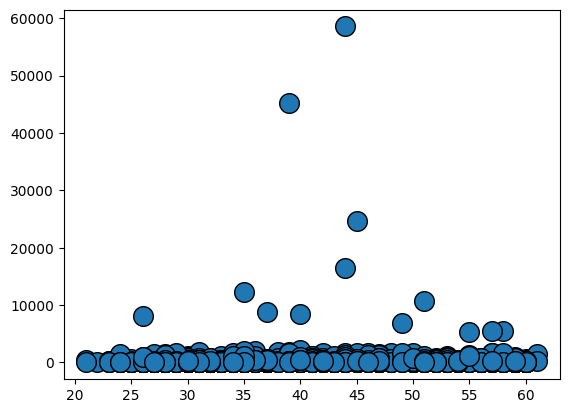

In [75]:
plt.scatter(svm_model.support_vectors_[:,0],svm_model.support_vectors_[:,1],s=200,edgecolors='k',marker="o",label="SVM")

RANDOM FOREST

In [168]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train,Y_train)
print("Training data accuracy:",rf_model.score(X_train,Y_train))
rf_pred = rf_model.predict(X_test)
print("Test data accuracy:",accuracy_score(Y_test,rf_pred))

Training data accuracy: 0.9958677685950413
Test data accuracy: 0.7664835164835165


In [ ]:
#Due to less Accuracy let we change the lable process
#One-Hot encoding

In [41]:
X_enc = X.iloc[:,:7]

In [48]:
X_enc.columns

Index(['Response', 'Age', 'Job', 'Marital Status', 'Education', 'balance',
       'housing'],
      dtype='object')

In [49]:
X_enc_new = X_enc[['Response','Job','Marital Status','Education','housing']]

In [50]:
X_enc_new

,Response,Job,Marital Status,Education,housing
0,yes,retired,married,secondary,no
1,yes,services,married,tertiary,no
2,yes,management,married,primary,no
3,yes,unemployed,divorced,primary,yes
4,yes,management,single,tertiary,yes
...,...,...,...,...,...
1811,yes,unemployed,married,primary,yes
1812,yes,management,single,primary,yes
1813,yes,technician,married,tertiary,no
1814,yes,unemployed,married,primary,yes


In [61]:
X_enc_new_encoding_ = pd.get_dummies(X_enc,columns=X_enc_new.columns,drop_first=True,dtype=int)

In [62]:
X_enc_new_encoding_

,Age,balance,Response_yes,Job_bluecollar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_selfemployed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital Status_married,Marital Status_single,Education_secondary,Education_tertiary,Education_unknown,housing_yes
0,59,49,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,31,90,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,47,145,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,45,249,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,36,559,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,49,11,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1812,43,39,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1813,56,736,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1814,28,44,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X_enc_new_encoding_,y,test_size=0.2)

In [64]:
X_train.shape,Y_train.shape

((1452, 20), (1452,))

In [65]:
model_en = dt.fit(X_train,Y_train)

In [66]:
model_en.score(X_train,Y_train)

0.9986225895316805

In [67]:
pred_en = model_en.predict(X_test)

In [68]:
accuracy_score(Y_test,pred_en)

0.6840659340659341

In [90]:
#Scalling
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

In [97]:
scaler_X_train = scaler.fit_transform(X_train)

In [94]:
scaler_X_test = scaler.transform(X_test)

In [98]:
scaler_model = dt.fit(scaler_X_train,Y_train)

In [99]:
scaler_pred = scaler_model.predict(scaler_X_test)

In [100]:
accuracy_score(Y_test,scaler_pred)

0.7225274725274725